# Import Libraries

In [81]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 

# Load and Process Data

In [82]:
# Read the file into a pandas data frame.
df = pd.read_csv("../data/childrenDiagnosis.csv", header=0, delim_whitespace=False,na_values='?') 
df

Y       filename     sex  age  age_years  corpus group  child_TNW  \
0     1   fssli009.cha     NaN  165  13.750000  Conti4   SLI        287   
1     1   fssli058.cha     NaN  172  14.333333  Conti4   SLI        368   
2     1   fssli062.cha     NaN  160  13.333333  Conti4   SLI        266   
3     1   fssli066.cha     NaN  184  15.333333  Conti4   SLI        405   
4     1   fssli108.cha     NaN  176  14.666667  Conti4   SLI        300   
5     1   fssli113.cha     NaN  178  14.833333  Conti4   SLI        224   
6     1   fssli501.cha     NaN  180  15.000000  Conti4   SLI        385   
7     1   fssli519.cha     NaN  163  13.583333  Conti4   SLI        571   
8     1   fssli526.cha     NaN  162  13.500000  Conti4   SLI        355   
9     1   fssli528.cha     NaN  176  14.666667  Conti4   SLI        247   
10    1   fssli536.cha     NaN  180  15.000000  Conti4   SLI        472   
11    1   fssli568.cha     NaN  179  14.916667  Conti4   SLI        475   
12    1   fssli576.cha     NaN  184  15.333333  Conti4   SLI        205   
13    1   fssli589.cha     NaN  157  13.083333  Conti4   SLI        139   
14    1   fssli591.cha     NaN  168  14.000000  Conti4   SLI        332   
15    1   fssli592.cha     NaN  171  14.250000  Conti4   SLI        259   
16    1   fssli599.cha     NaN  164  13.666667  Conti4   SLI        564   
17    1   fssli608.cha     NaN  167  13.916667  Conti4   SLI        113   
18    1   fssli613.cha     NaN  174  14.500000  Conti4   SLI        397   
19    0     fskb01.cha     NaN  166  13.833333  Conti4    TD        298   
20    0     fskb02.cha     NaN  168  14.000000  Conti4    TD        274   
21    0     fskb03.cha     NaN  177  14.750000  Conti4    TD        446   
22    0     fskb04.cha     NaN  157  13.083333  Conti4    TD        735   
23    0     fskb05.cha     NaN  179  14.916667  Conti4    TD        732   
24    0     fskb06.cha     NaN  181  15.083333  Conti4    TD        171   
25    0     fskb07.cha     NaN  186  15.500000  Conti4    TD        392   
26    0     fskb08.cha     NaN  167  13.916667  Conti4    TD        525   
27    0     fskb09.cha     NaN  176  14.666667  Conti4    TD        603   
28    0     fskb10.cha     NaN  162  13.500000  Conti4    TD        454   
29    0     fskb11.cha     NaN  167  13.916667  Conti4    TD        256   
...  ..            ...     ...  ...        ...     ...   ...        ...   
1133  0  9y41753me.cha    male  109   9.083333  Gillam    TD        358   
1134  0  9y41763ct.cha  female  119   9.916667  Gillam    TD        407   
1135  0  9y41765ct.cha  female  118   9.833333  Gillam    TD        290   
1136  0   9y46133v.cha  female  119   9.916667  Gillam    TD        687   
1137  0   9y46134v.cha  female  119   9.916667  Gillam    TD        402   
1138  0   9y46139v.cha  female  115   9.583333  Gillam    TD        372   
1139  0   9y46161v.cha  female  111   9.250000  Gillam    TD        372   
1140  0   9y46164v.cha    male  111   9.250000  Gillam    TD        268   
1141  0   9y46168v.cha  female  108   9.000000  Gillam    TD        365   
1142  0  9y46672nj.cha    male  112   9.333333  Gillam    TD        674   
1143  0  9y46723nj.cha  female  108   9.000000  Gillam    TD        350   
1144  0  9y46743nj.cha    male  111   9.250000  Gillam    TD        387   
1145  0  9y46778ca.cha    male  118   9.833333  Gillam    TD        943   
1146  0  9y46800ca.cha    male  112   9.333333  Gillam    TD        468   
1147  0  9y46803ca.cha  female  111   9.250000  Gillam    TD        405   
1148  0  9y46805ca.cha  female  113   9.416667  Gillam    TD        467   
1149  0  9y46807ca.cha  female  113   9.416667  Gillam    TD        427   
1150  0  9y46811ca.cha    male  119   9.916667  Gillam    TD        460   
1151  0  9y46819az.cha  female  118   9.833333  Gillam    TD        440   
1152  0  9y46827ca.cha  female  115   9.583333  Gillam    TD        389   
1153  0  9y46828ca.cha    male  108   9.000000  Gillam    TD        457   
1154  0  9y46832ca.cha    male 

In [83]:
df1 = np.array(df)
df1.shape
print(df.columns.values)

['Y' 'filename' 'sex' 'age' 'age_years' 'corpus' 'group' 'child_TNW'
 'child_TNS' 'examiner_TNW' 'freq_ttr' 'r_2_i_verbs' 'mor_words'
 'num_pos_tags' 'n_dos' 'repetition' 'retracing' 'fillers' 's_1g_ppl'
 's_2g_ppl' 's_3g_ppl' 'd_1g_ppl' 'd_2g_ppl' 'd_3g_ppl' 'z_mlu_sli'
 'z_mlu_td' 'z_word_errors_sli' 'z_word_errors_td' 'z_r_2_i_verbs_sli'
 'z_r_2_i_verbs_td' 'z_utts_sli' 'z_utts_td' 'total_syl' 'average_syl'
 'mlu_words' 'mlu_morphemes' 'mlu100_utts' 'verb_utt' 'dss' 'ipsyn_total'
 'present_progressive' 'propositions_in' 'propositions_on' 'plural_s'
 'irregular_past_tense' 'possessive_s' 'uncontractible_copula' 'articles'
 'regular_past_ed' 'regular_3rd_person_s' 'irregular_3rd_person'
 'uncontractible_aux' 'contractible_copula' 'contractible_aux'
 'word_errors' 'f_k' 'n_v' 'n_aux' 'n_3s_v' 'det_n_pl' 'det_pl_n' 'pro_aux'
 'pro_3s_v' 'total_error']


In [30]:
X = df1[:, 2:]
y = df1[:, 0]

print(X)

[[nan 165 13.75 ..., 0 1 12]
 [nan 172 14.33333333 ..., 0 0 9]
 [nan 160 13.33333333 ..., 0 0 6]
 ..., 
 ['male' 119 9.916666667000001 ..., 0 4 9]
 ['male' 112 9.333333332999999 ..., 0 5 15]
 ['male' 108 9.0 ..., 0 4 12]]


In [ ]:
# Splitting the dataset into training and test data.
# Select first 600 rows as training dataset and the remaining rows as test dataset.
X_train = X[:600, :]
Y_train = y[:600]
X_test = X[600:, :]
Y_test = y[600:]


# Visualizing the Data

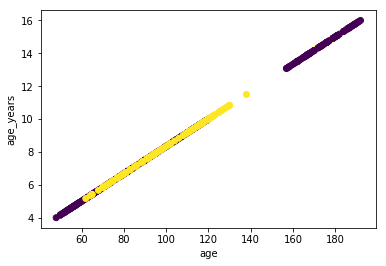

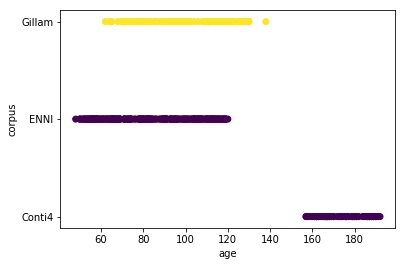

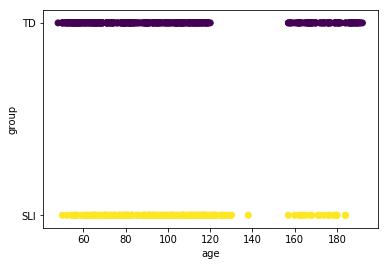

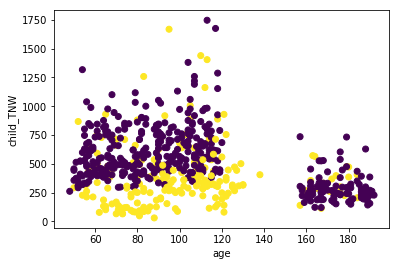

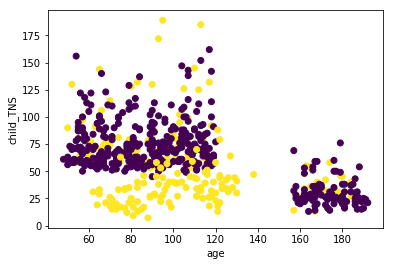

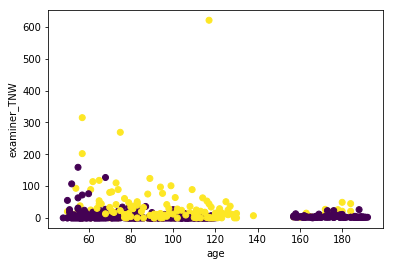

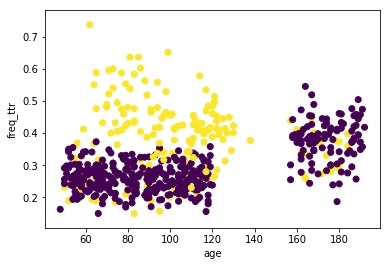

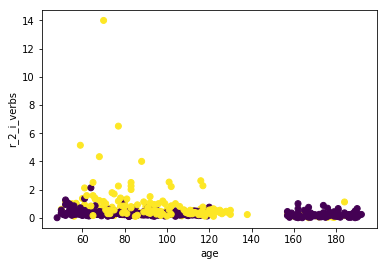

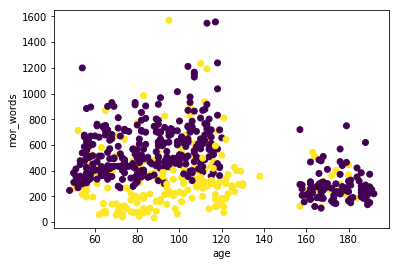

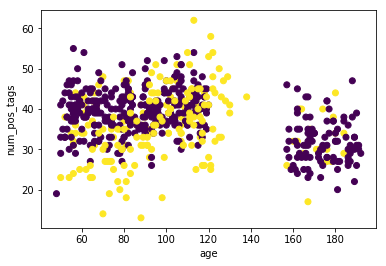

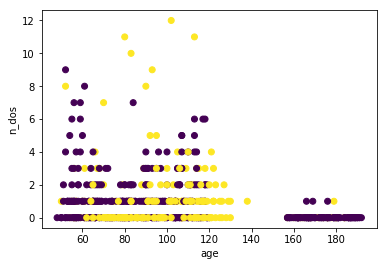

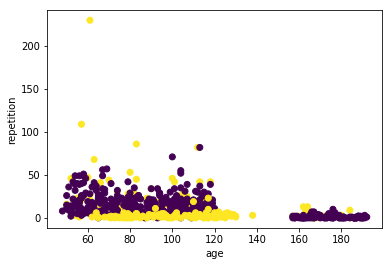

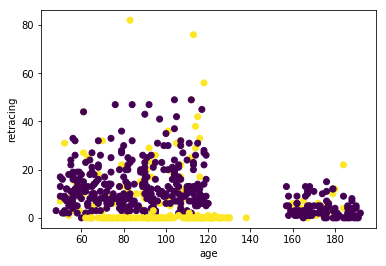

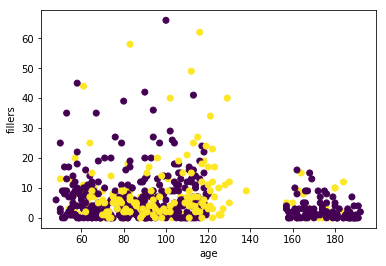

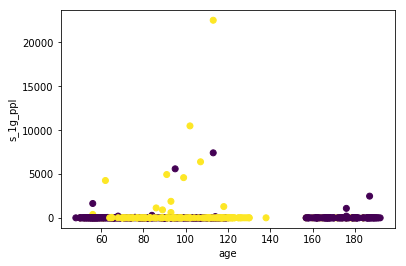

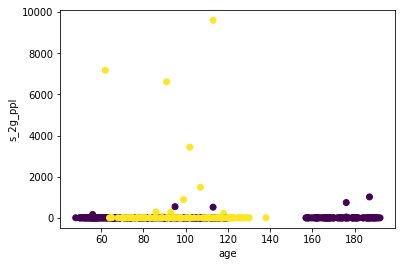

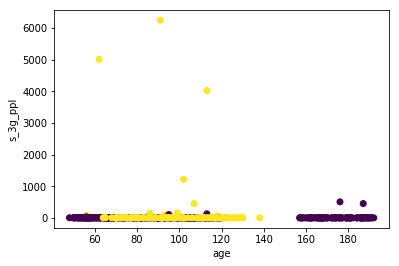

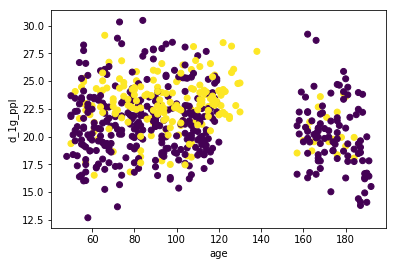

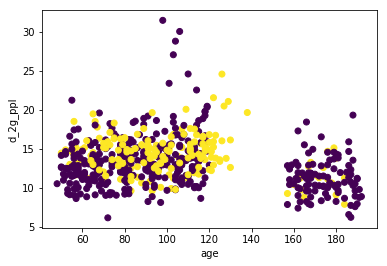

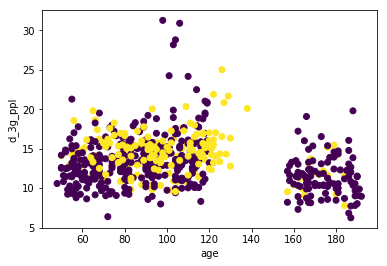

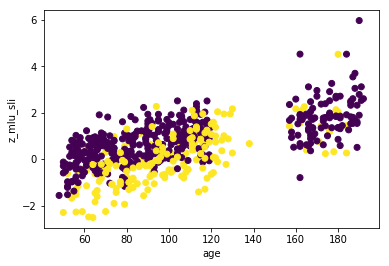

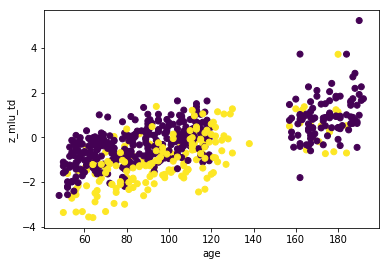

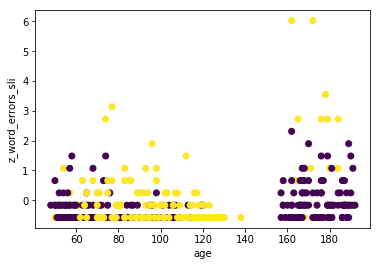

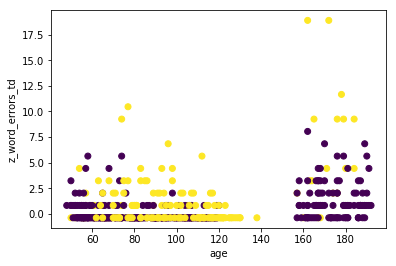

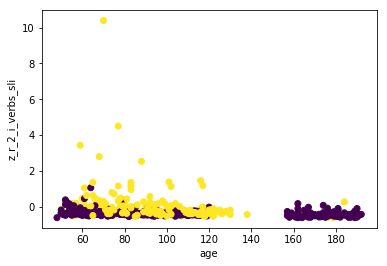

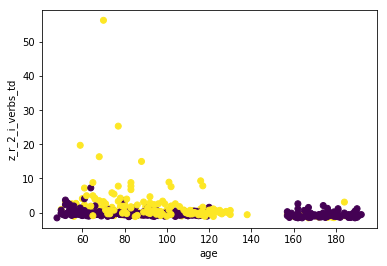

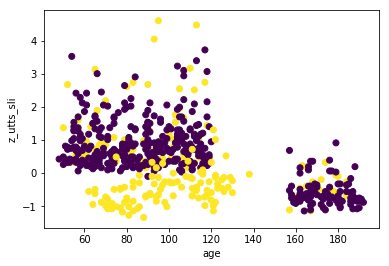

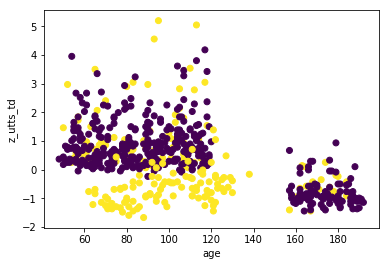

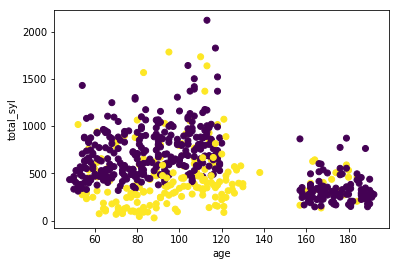

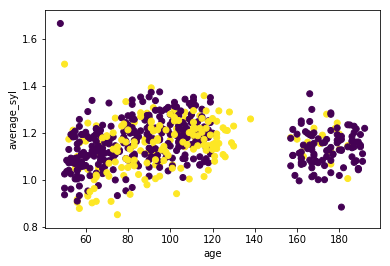

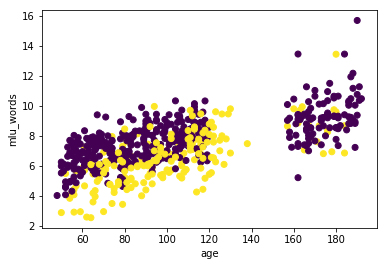

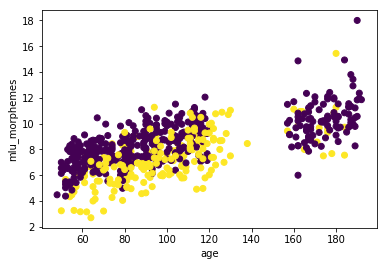

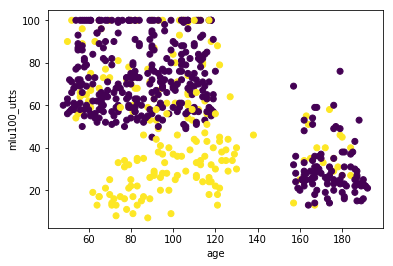

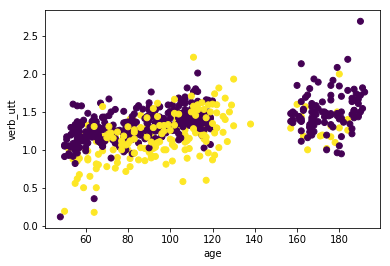

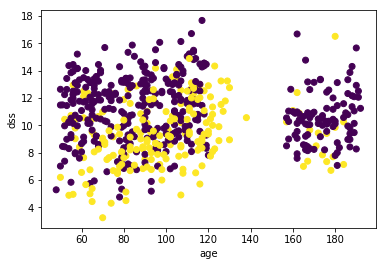

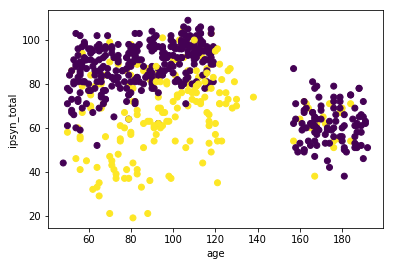

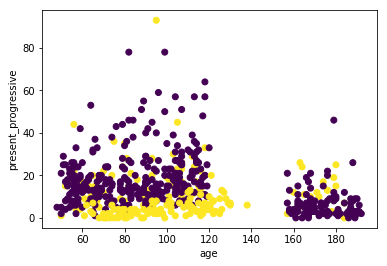

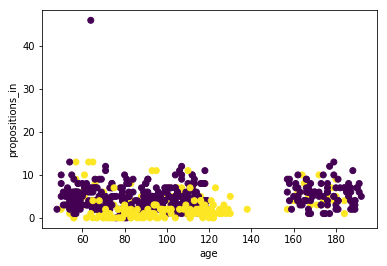

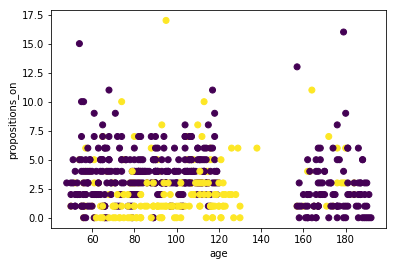

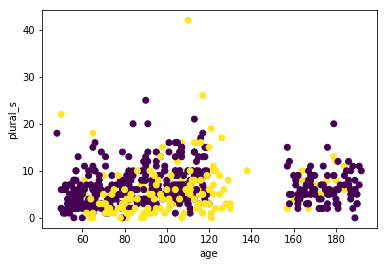

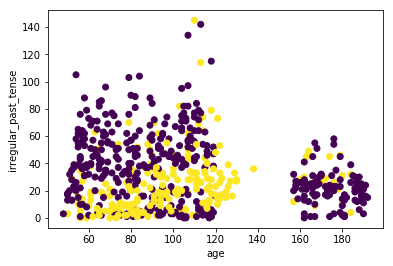

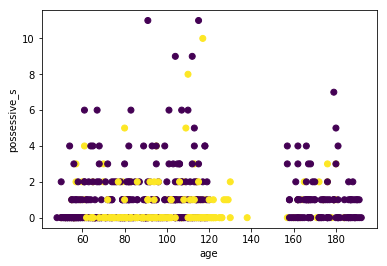

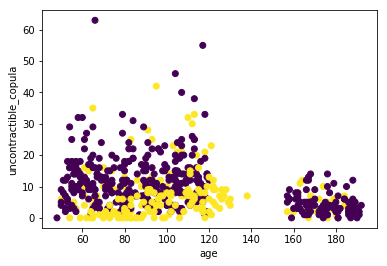

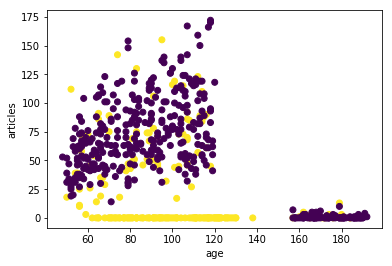

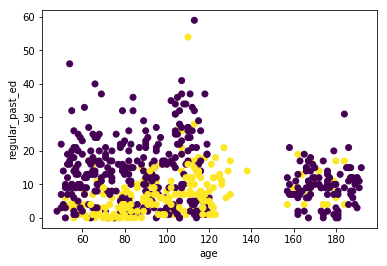

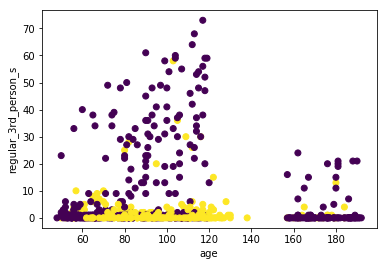

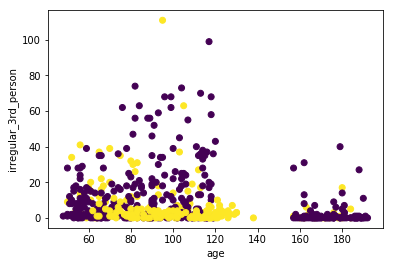

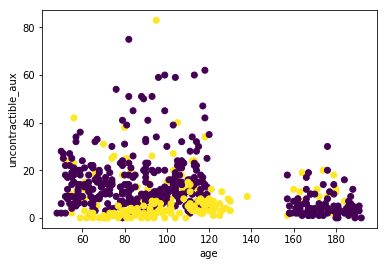

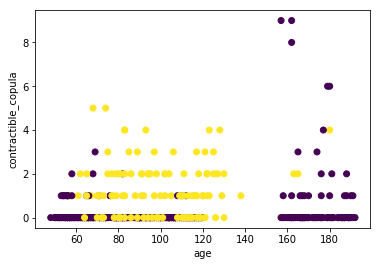

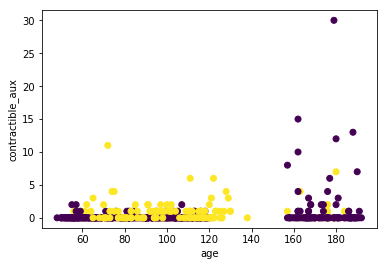

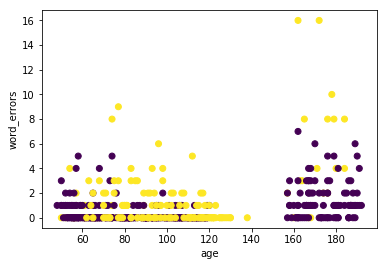

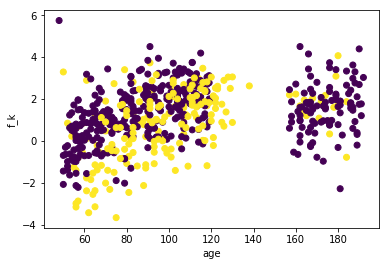

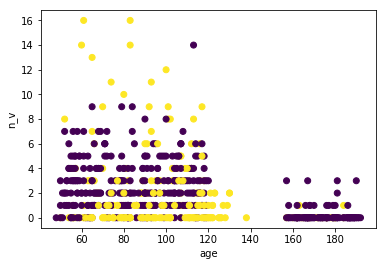

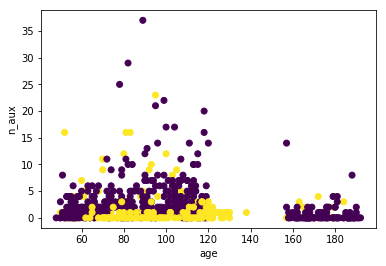

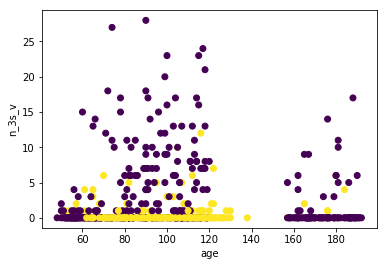

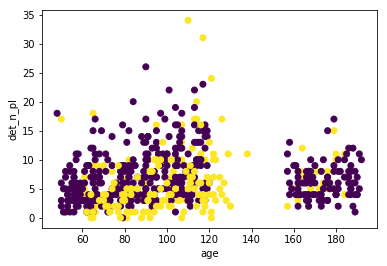

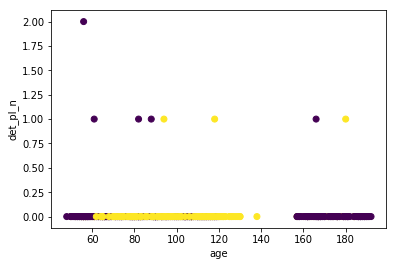

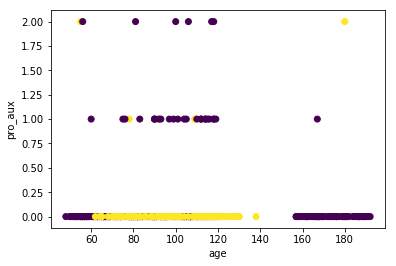

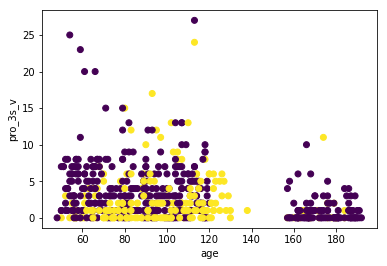

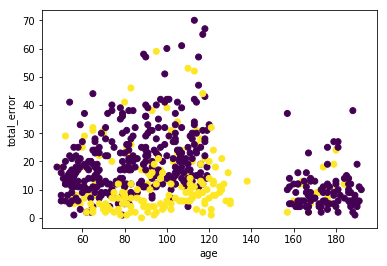

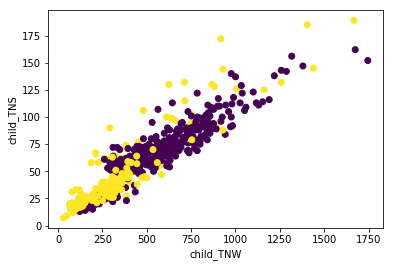

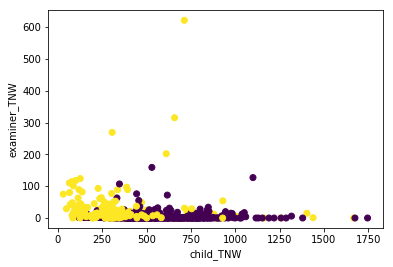

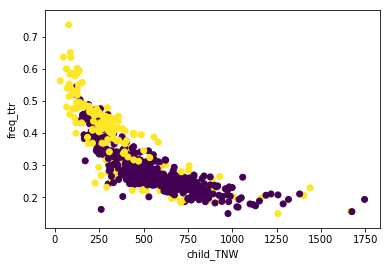

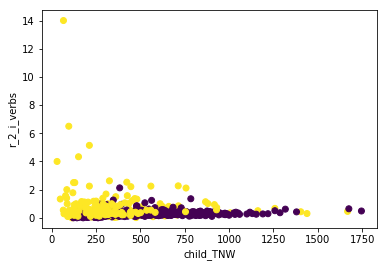

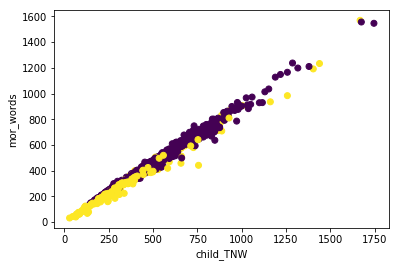

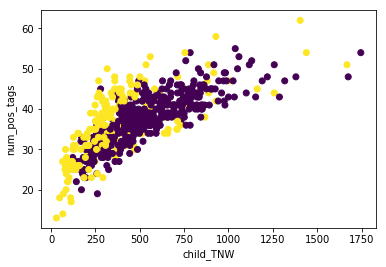

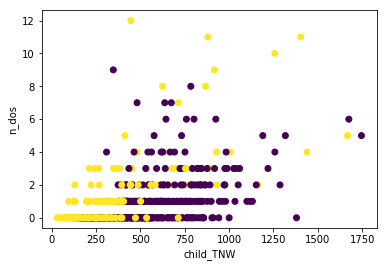

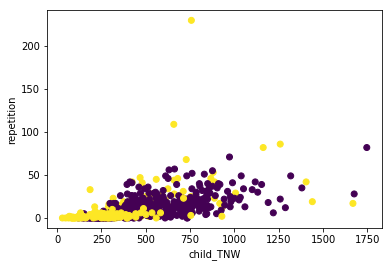

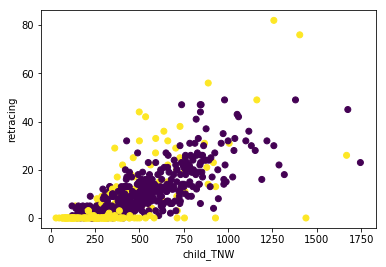

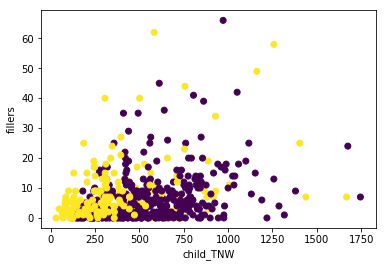

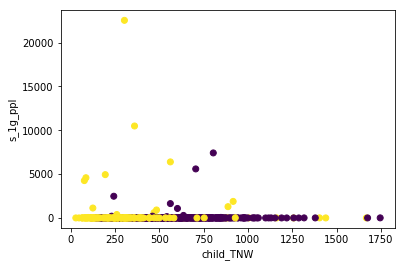

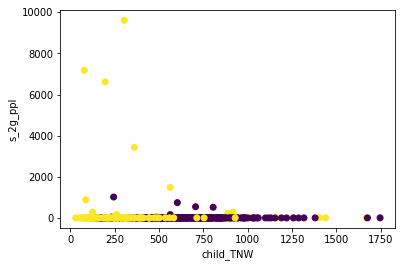

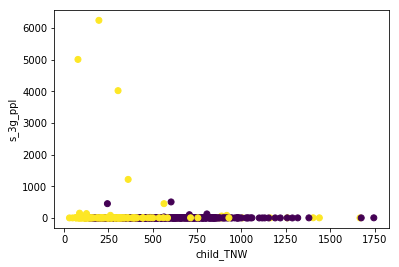

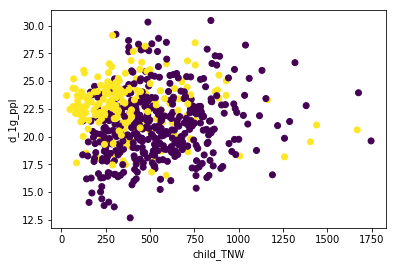

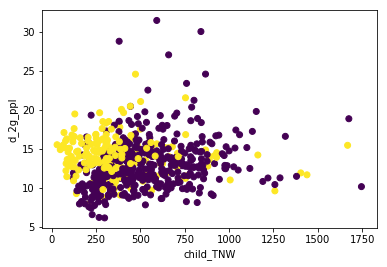

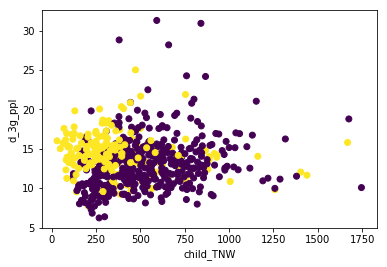

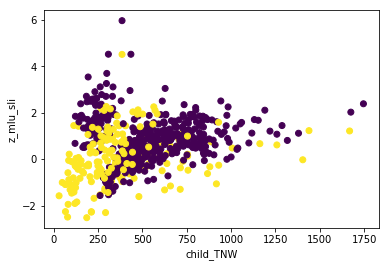

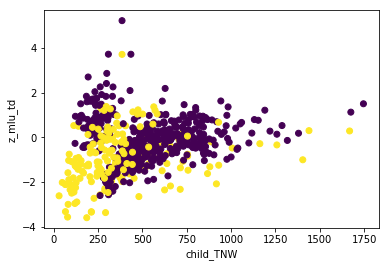

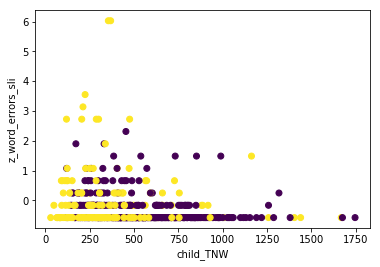

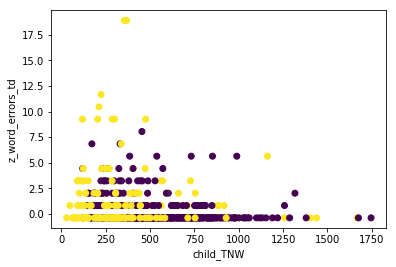

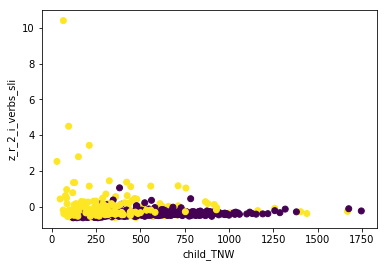

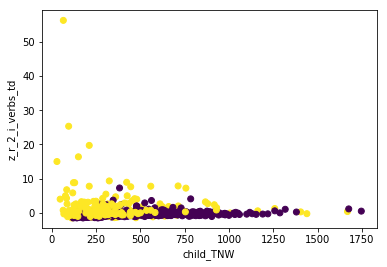

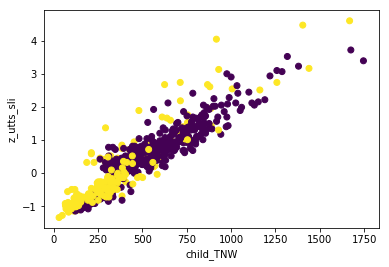

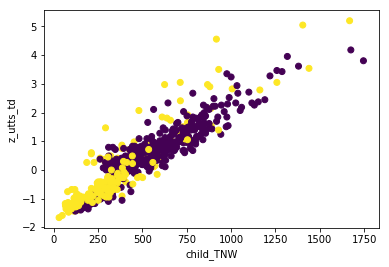

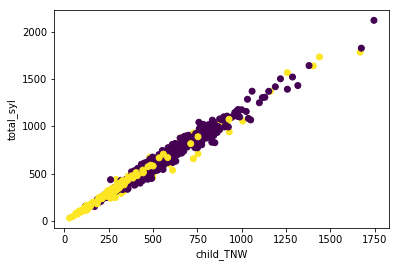

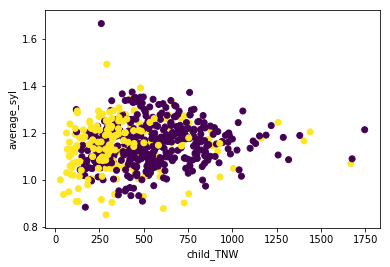

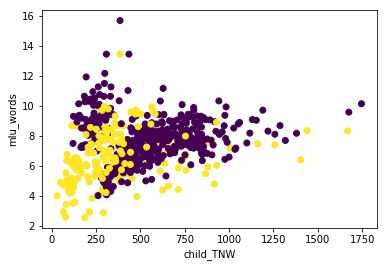

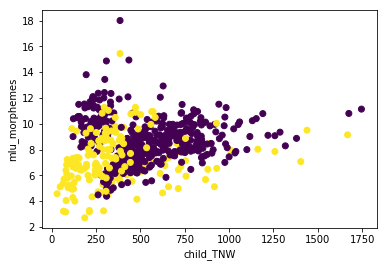

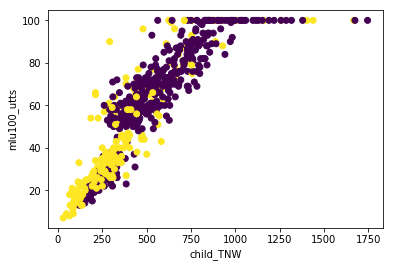

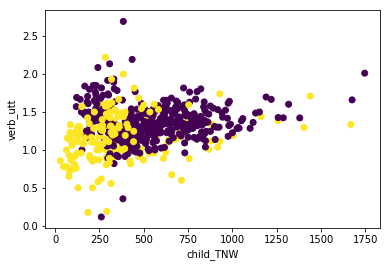

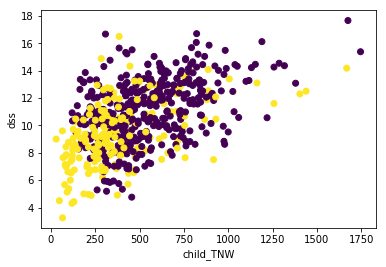

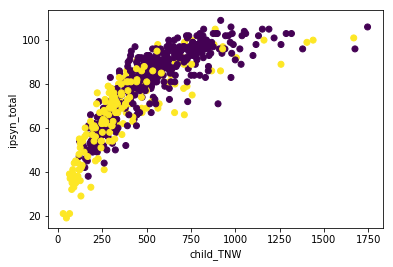

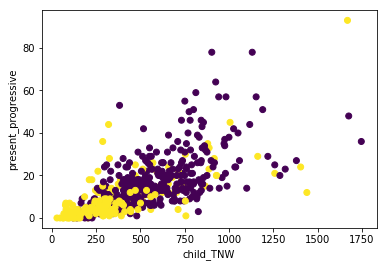

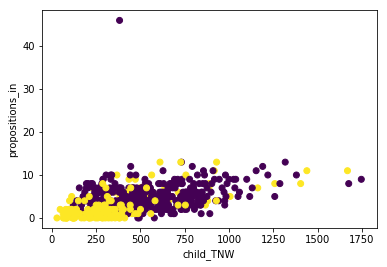

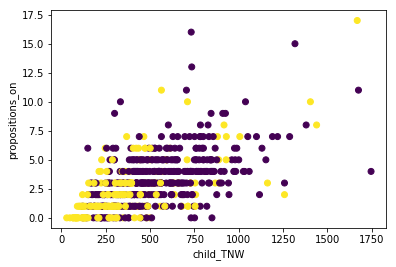

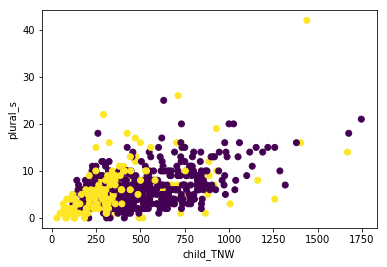

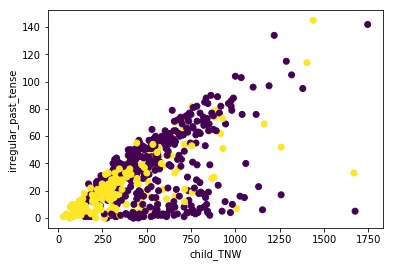

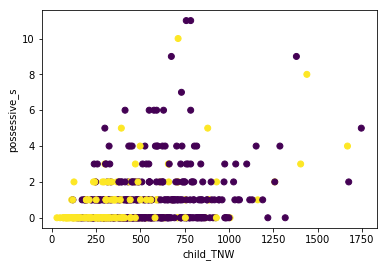

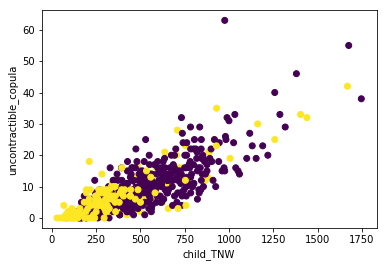

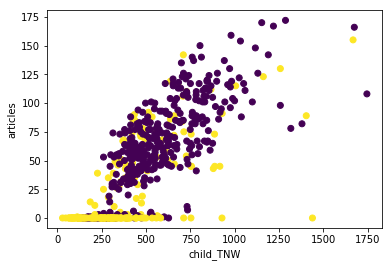

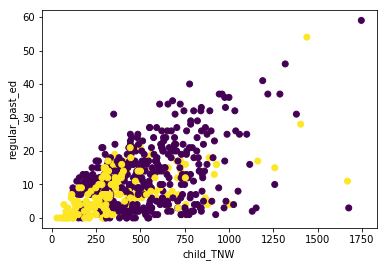

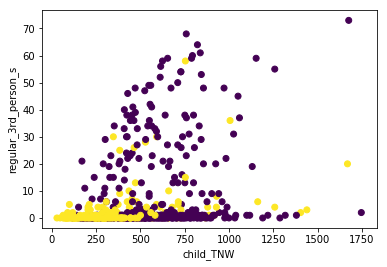

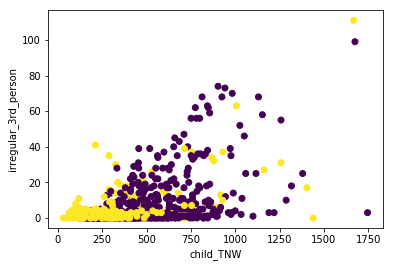

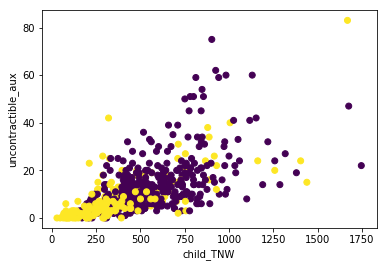

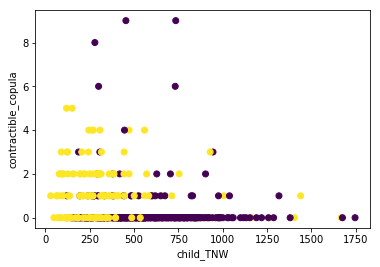

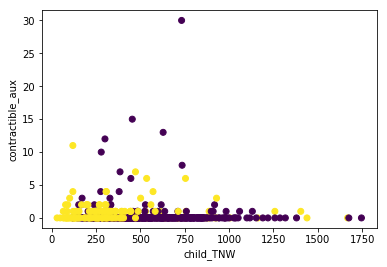

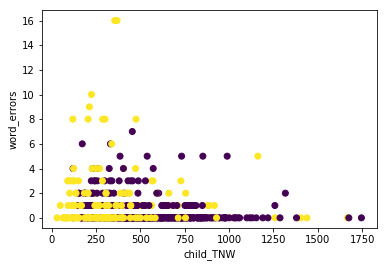

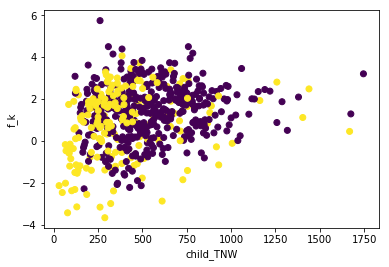

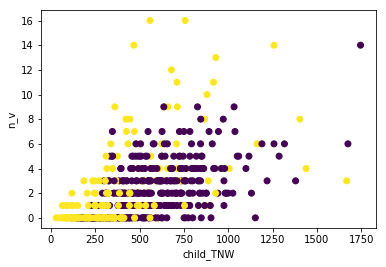

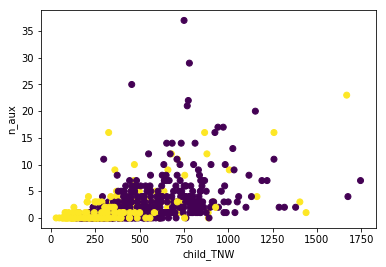

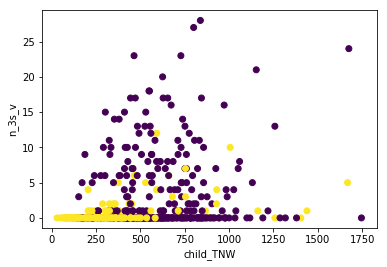

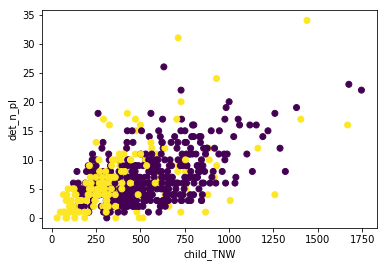

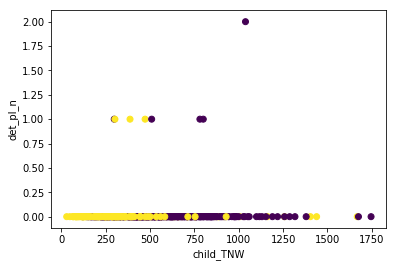

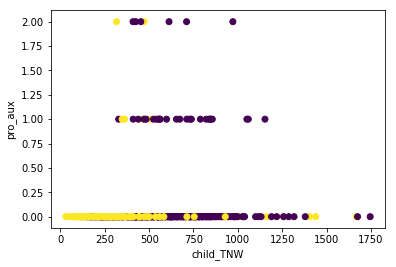

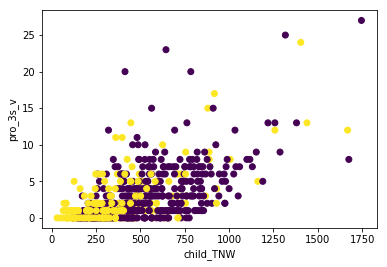

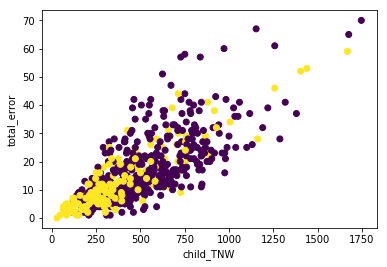

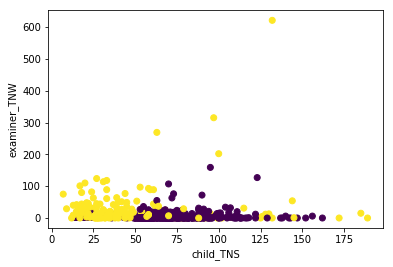

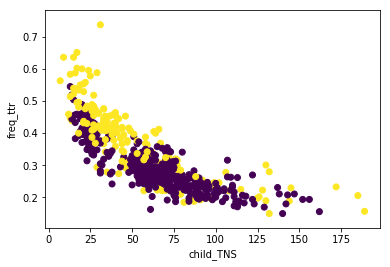

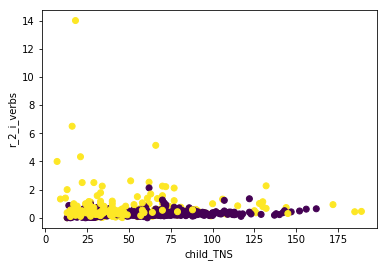

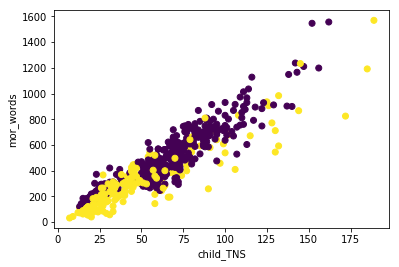

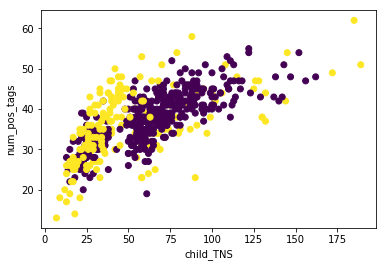

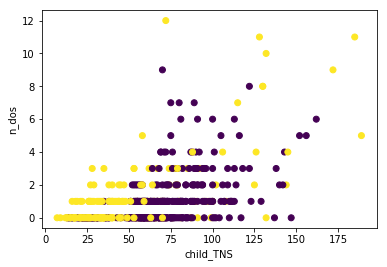

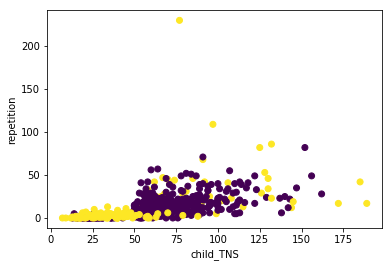

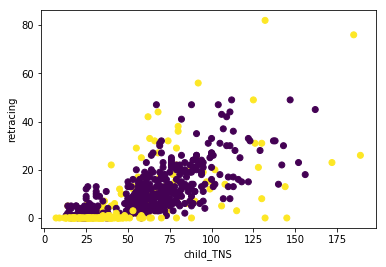

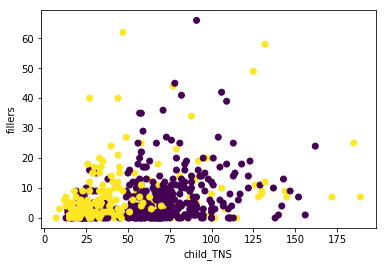

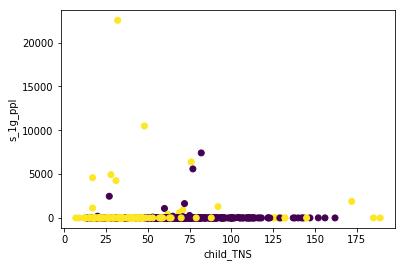

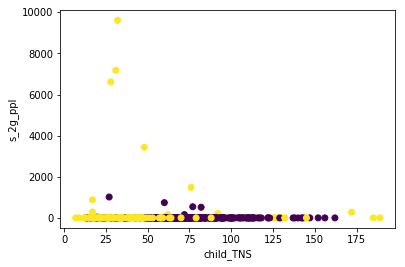

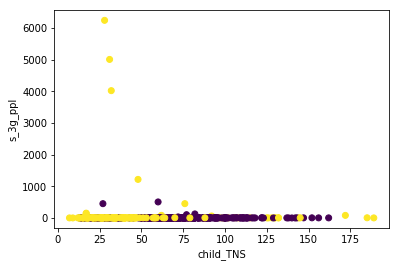

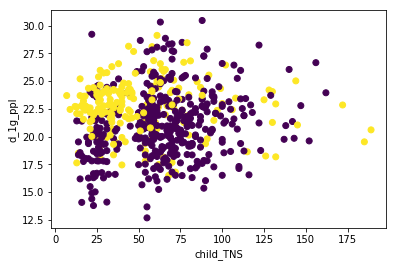

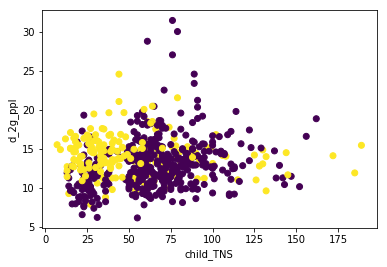

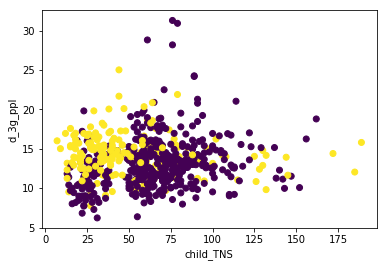

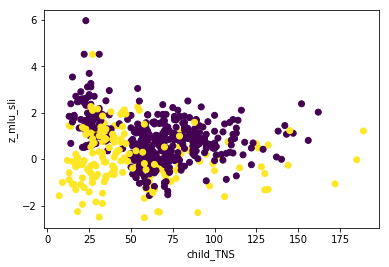

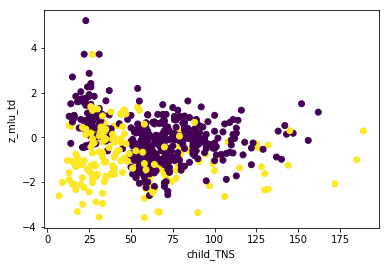

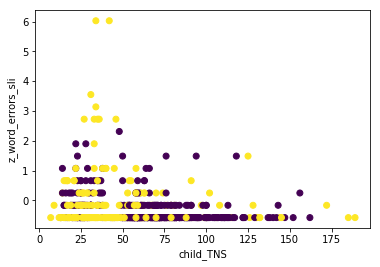

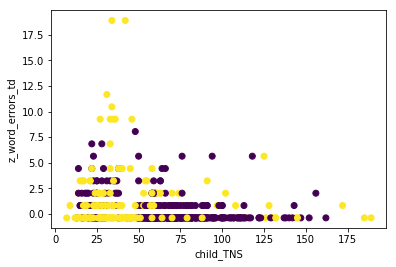

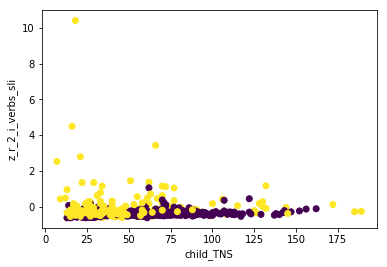

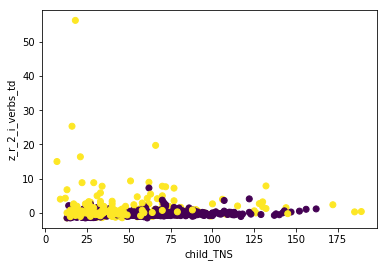

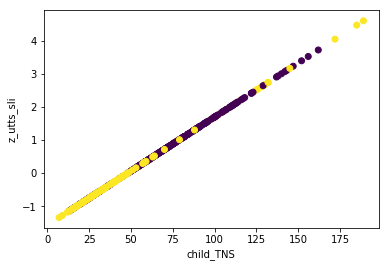

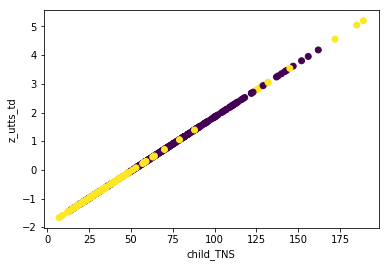

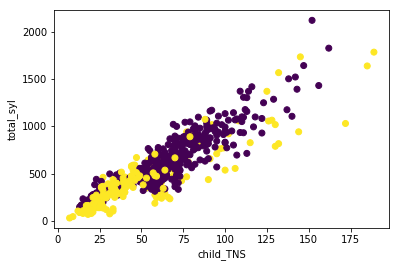

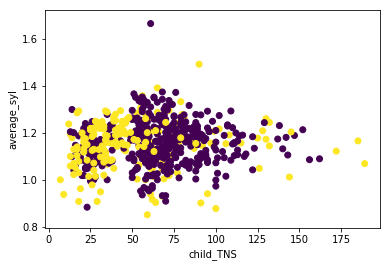

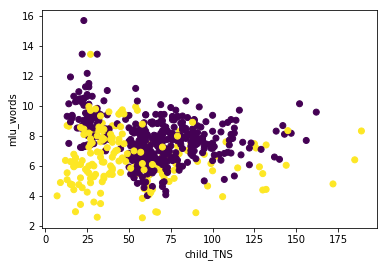

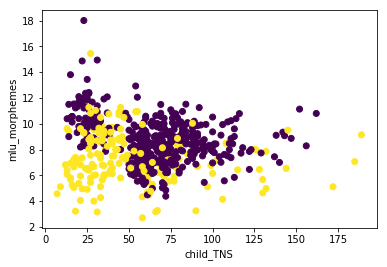

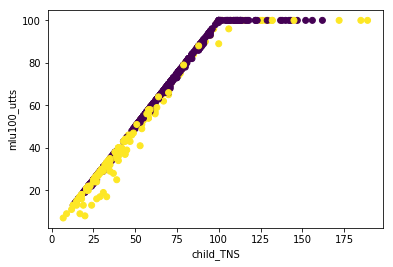

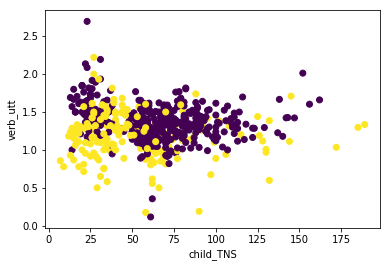

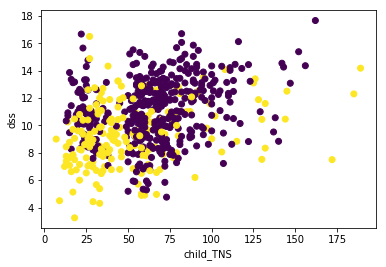

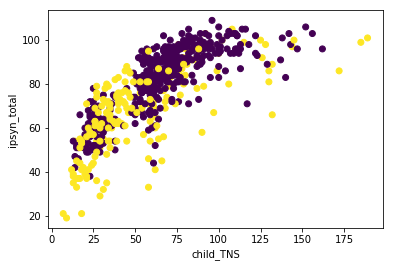

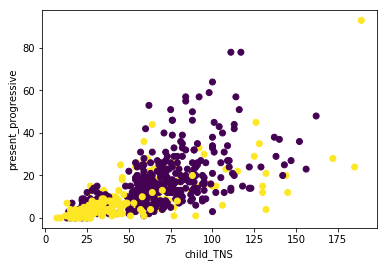

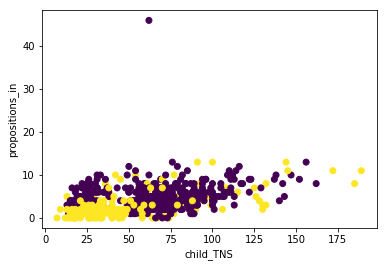

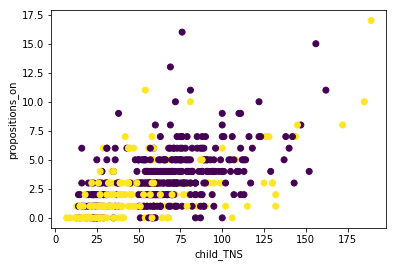

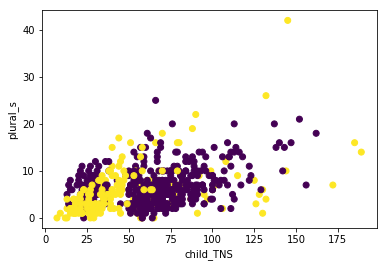

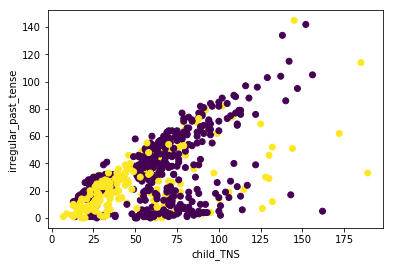

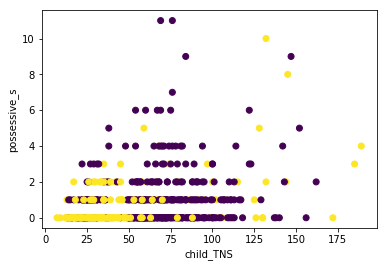

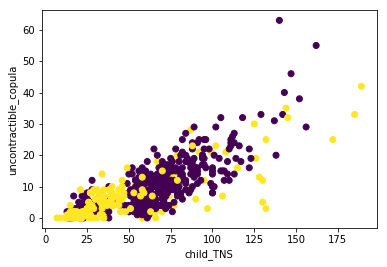

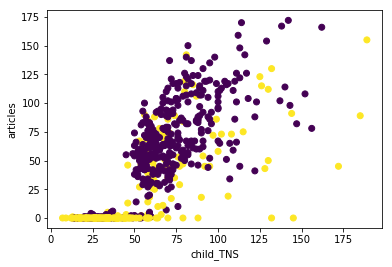

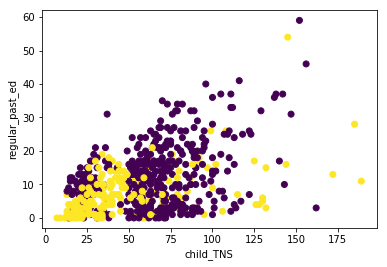

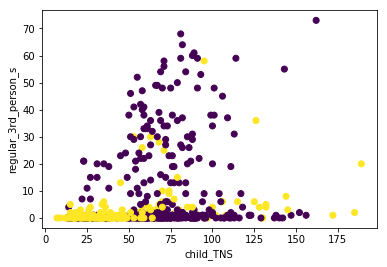

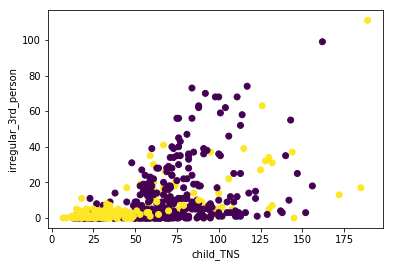

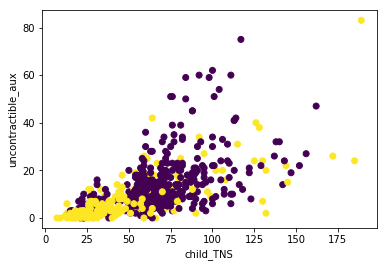

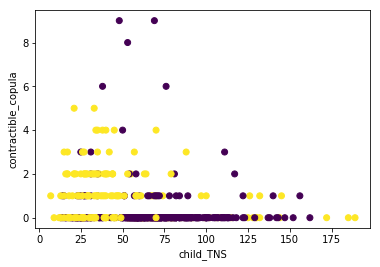

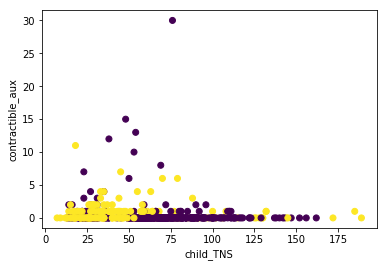

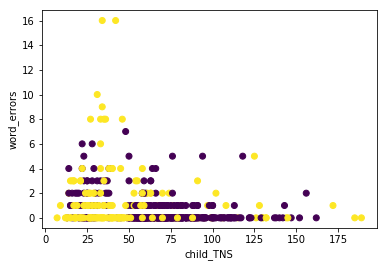

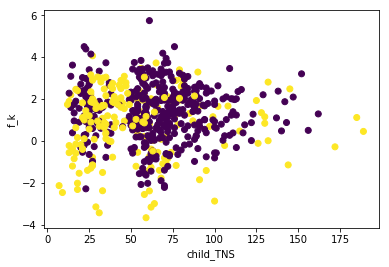

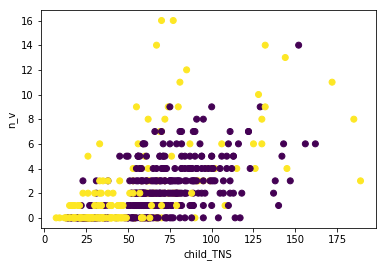

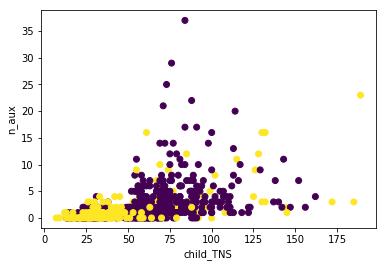

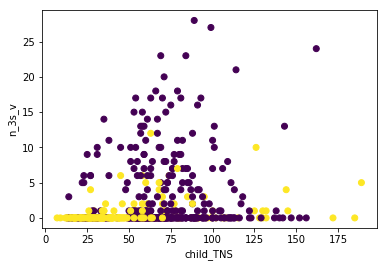

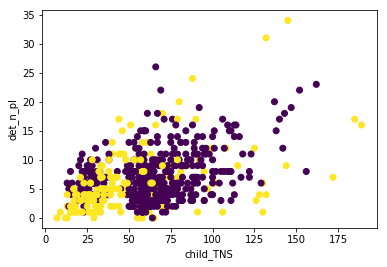

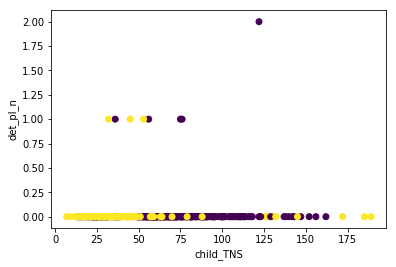

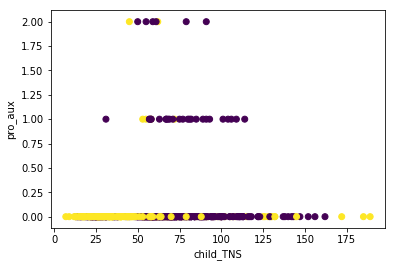

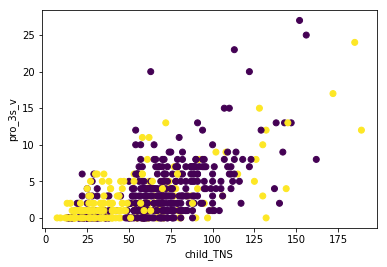

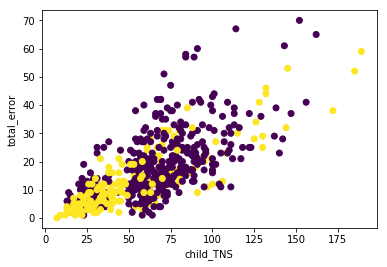

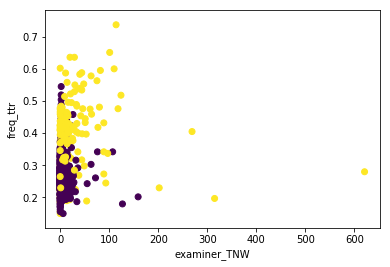

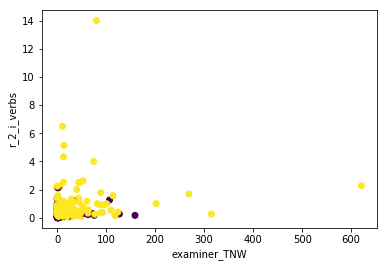

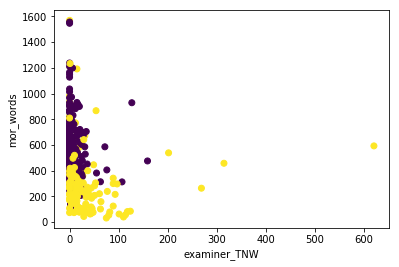

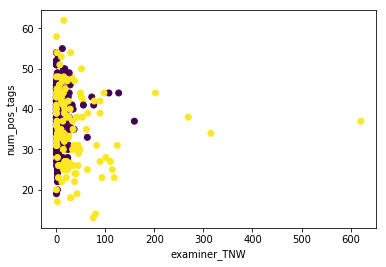

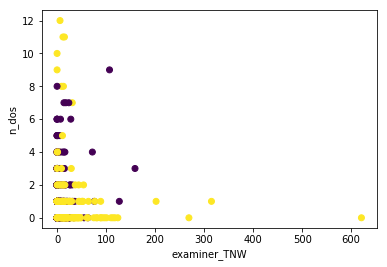

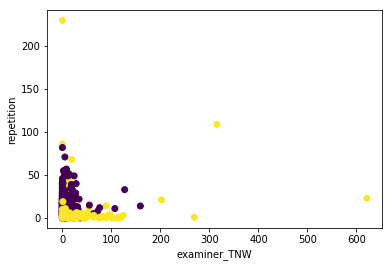

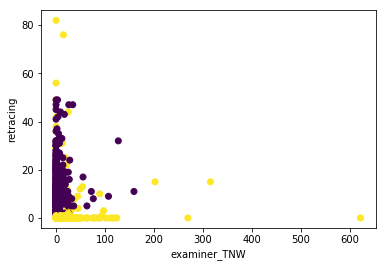

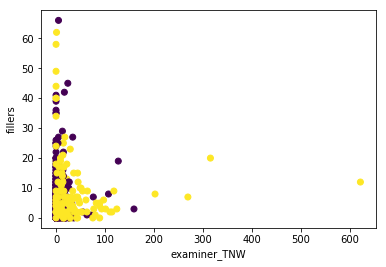

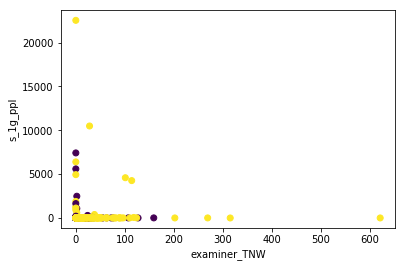

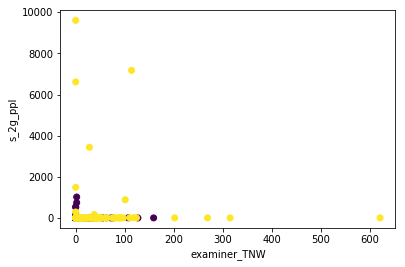

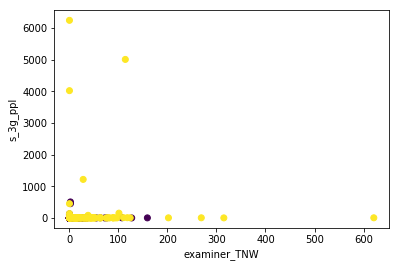

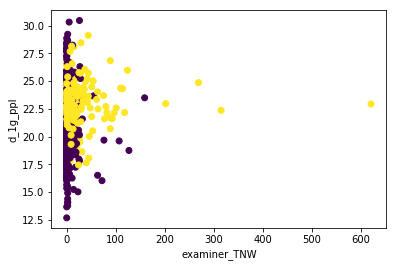

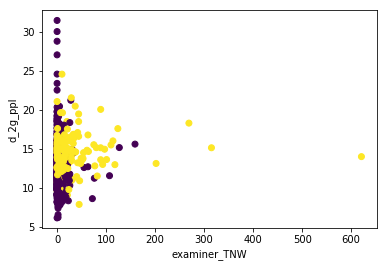

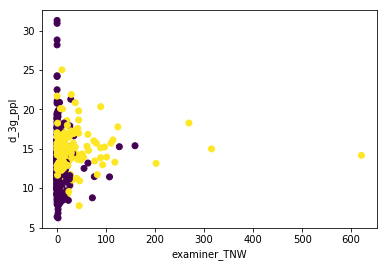

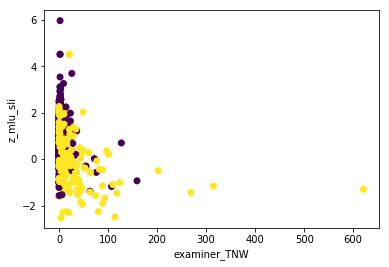

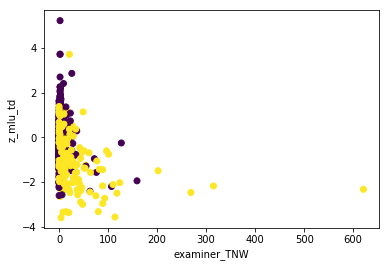

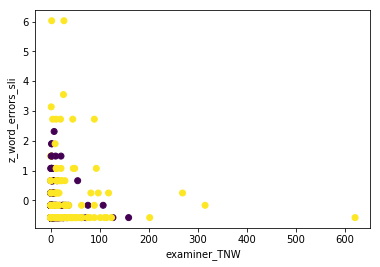

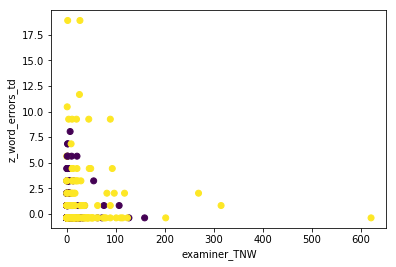

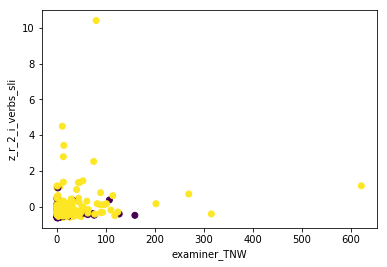

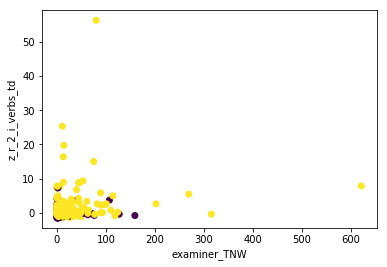

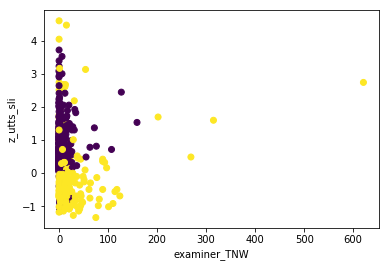

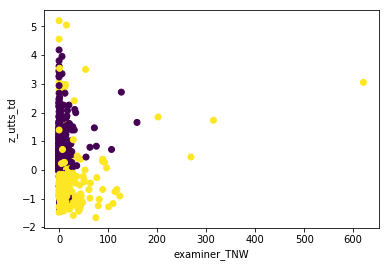

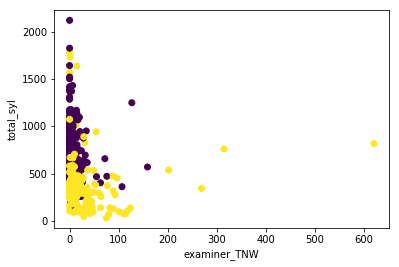

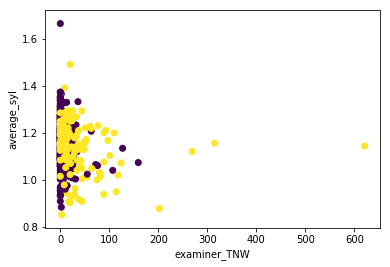

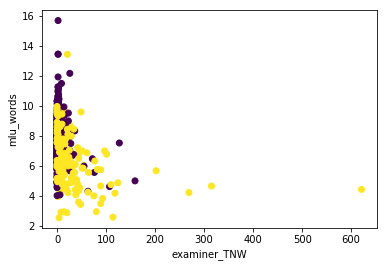

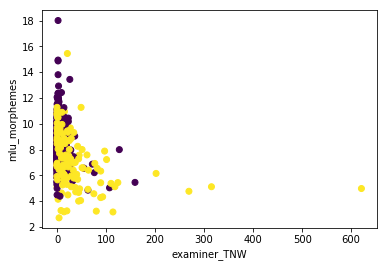

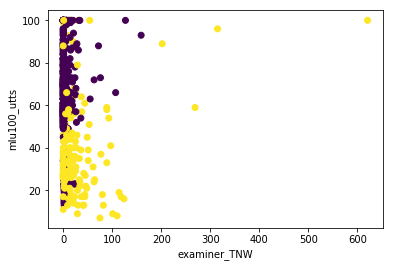

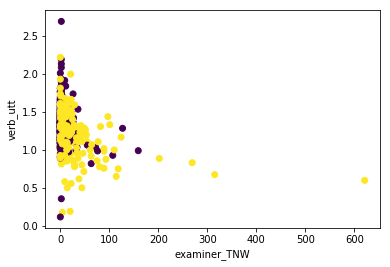

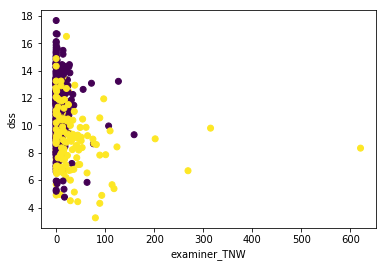

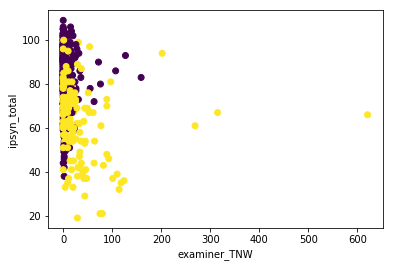

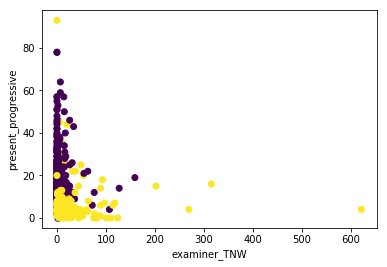

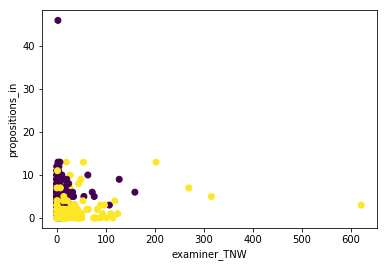

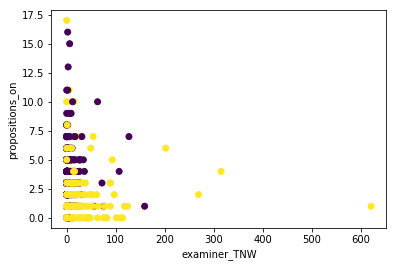

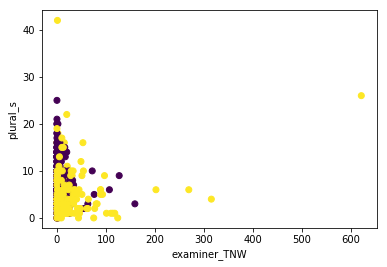

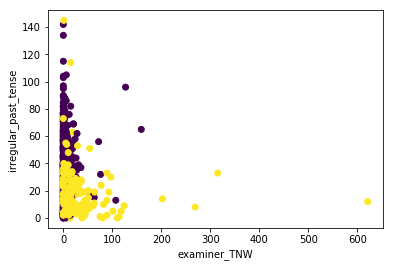

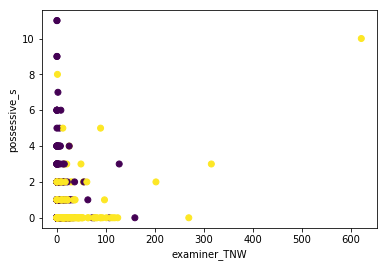

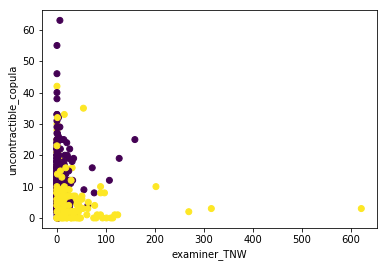

In [ ]:
for i in range(0, len(X[0])):
    for j in range(i+1, len(X[0])):
        if(type(X_train[0][i]) is int and
          type(X_train[0][j] is int)):
            plt.scatter(X_train[:, i], X_train[:, j], c=Y_train)
            plt.xlabel(df.columns.values[i+2])
            plt.ylabel(df.columns.values[j+2])
            plt.legend()
            plt.show()

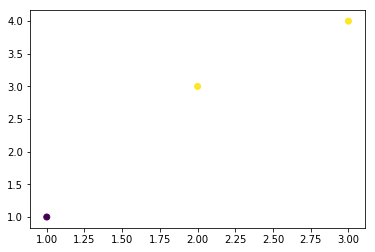